In [1]:
import scipy.stats

def fieller_interval(mean_x, var_x, mean_y, var_y, alpha=0.05):
   """Confidence interval for X/Y; see https://arxiv.org/pdf/0710.2024.pdf"""
   z = scipy.stats.norm().ppf(1 - alpha / 2)
   t = z  # Uses z instead of t (assumes large n)
   divisor = mean_y**2 - (t**2 * var_y)
   center = (mean_y * mean_x) / divisor
   spread = (((mean_y * mean_x)**2 -
              ((mean_y**2 - (t**2 * var_y)) *
               (mean_x**2 - (t**2 * var_x))) )**0.5 /
             divisor)
   return center - spread, center + spread

In [2]:
x = scipy.stats.norm(loc=110, scale=25).rvs(size=1000, random_state=110)
y = scipy.stats.norm(loc=100, scale=25).rvs(size=1000, random_state=100)

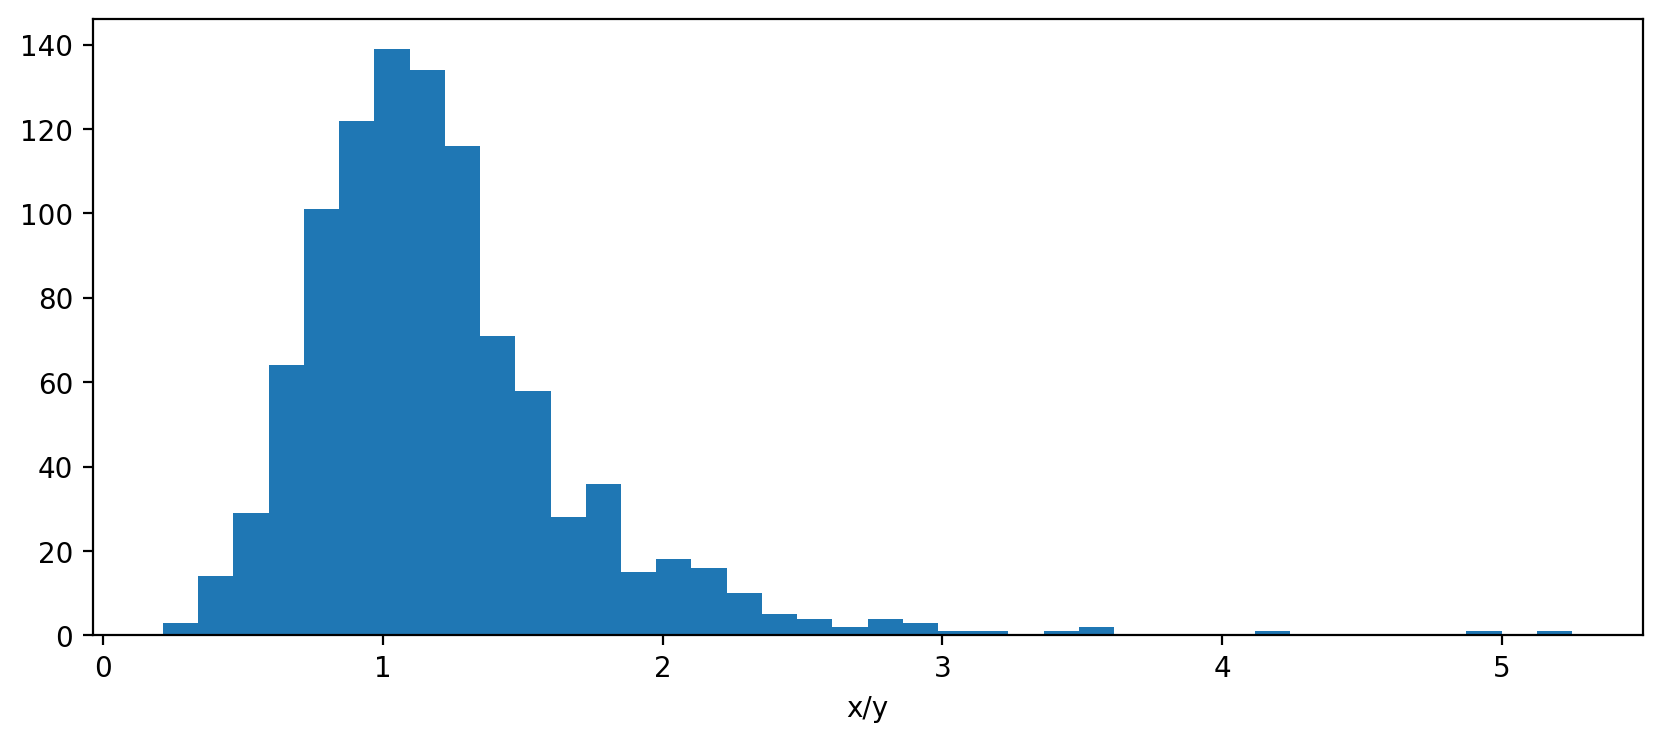

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(x/y, bins=40)
plt.xlabel('x/y')
plt.show()

In [4]:
x.mean() / y.mean()

1.1066968280110332

In [5]:
a, b = fieller_interval(x.mean(), x.var(), y.mean(), y.var())

In [6]:
a + (b - a) / 2

1.505351126003085

In [7]:
sum(x/y < a), sum(x/y > b)

(30, 22)